In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def est_pi(size=1000):
    """
    Generates an estimate of pi along with additional details.
    
    In addition to estimate of pi, the function returns an array of points used in the estimation,
    and a boolean array indicating whether the point falls inside the unit cirlce as a 3 element 
    tuple. Both returned arrays contain 'size' (detault=1000) elements.
    
    Parameters:
    -----------
    size : int, optional
        The number of points used in the simulation (default is 1000).     
    """
    pts = np.random.uniform(-1,1,size=(size, 2))
    inside = pts[:,0]**2 + pts[:,1]**2 < 1
    pi = round(float(sum(inside)) / size * 4, 10)     
    return pi, pts, inside

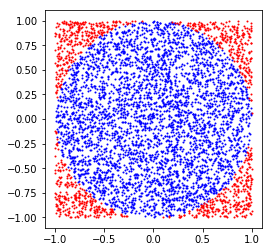

In [3]:
# run estimation with 5000 points and get the pts/inside arrays
_, pts, inside = est_pi(5000)

# plot the points
plt.scatter(pts[inside][:,0], pts[inside][:,1], color='blue', s=1)
plt.scatter(pts[~inside][:,0], pts[~inside][:,1], color='red', s=1)

# set reasonable margis, ensure properly scaled aspect ratio and show plot
plt.margins(.05)
plt.gca().set_aspect('equal')
plt.show()

<h1>Geometry:</h1>
<ul>
    <li>Area of cirlce is $\pi*r^2 = \pi$</li>
    <li>Area of square is $(2*r) * (2*r) = 4$</li>
    <li>The chance of point falling inside the shape $\propto$ to area of shape.</li>
    <ul style="list-style: none;">
        <li>$\pi \approx \frac{\text{# pts in circle}}{\text{# pts in square}} * 4$</li>
    </ul>
</ul>

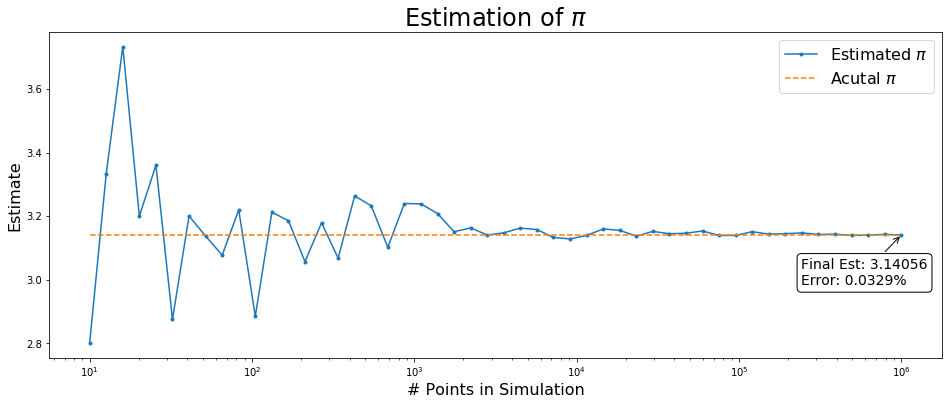

In [4]:
# setup simulation with various input sizes
sizes = np.logspace(1,6,50)
x = []
y = []
for size in sizes:
    pi = est_pi(int(size))[0]
    x.append(size)
    y.append(pi)

# setup & create plot
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)
pi = np.ones_like(x)*np.pi
plt.plot(x,y, linestyle='solid', marker='.', label='Estimated $\pi$')
plt.plot(x, pi, linestyle='dashed', label='Acutal $\pi$')

# style the plot
plt.xscale('log')
plt.legend(prop={'size': 16})
plt.xlabel('# Points in Simulation', fontsize=16)
plt.ylabel('Estimate', fontsize=16)
plt.title('Estimation of $\pi$', fontsize=24)

# label the last point
final_est = (x[-1], y[-1])
ax.annotate(f'Final Est: {final_est[1]}\nError: {np.abs(np.pi-final_est[1])/np.pi*100:.4f}%',
            xy=final_est, xycoords='data', xytext=(-100,-50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->"), bbox=dict(boxstyle="round", fc="w"), size=14)

# show the plot
plt.show()

<h1>Other resources:</h1>
<ul>
    <li>https://www.exploratorium.edu/snacks/pi-toss</li>
    <li>https://pythonprogramming.net/monte-carlo-simulator-python/</li>
</ul>